# 🍓 `compote` (Coefficients Of Multipoles of lensing POTEntials)

Author: Natalie B. Hogg

The `compote` package computes coefficients of the multipole expansion of a given lensing potential. This notebook demonstrates its use.

First import the potential from `compote` whose multipoles you wish to compute:

In [1]:
from compote.potentials.epl import EPL

Before getting the multipole coefficients, you can calculate the value of the potential for a given value of $\varphi$:

In [2]:
epl_fixed_phi = EPL()

phi = 0.5
theta = 1
f = 7/8
theta_E = 1
gamma = 2

potential = epl_fixed_phi.potential(phi, theta, f, theta_E, gamma)

print(potential)

(1.0949625687195794+0j)


Now import and initialise the Calculate class:

In [3]:
from compote.calculate.calculate import Calculate

calc = Calculate()

Next you can calculate the multipole coefficients of your chosen potential with some given parameter values:

In [4]:
epl = EPL() # new instance of EPL

In [5]:
theta = 1   # radial coordinate; result is independent of this
f = 7/8     # axis ratio of ellipse
theta_E = 1 # Einstein radius; result is independent of this
gamma = 2   # slope of the power law

In [6]:
orders = range(0, 12) # number of orders to compute

c_epl, error_epl = calc.coefficients(epl.potential, orders, theta, f, theta_E, gamma)

/home/nataliehogg/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


You can display the results as a dataframe...

In [7]:
dataframe = calc.results_dataframe(c_epl, error_epl, orders)

print(dataframe)

             c_n         error
0   1.069045e+00  1.191814e-09
1  -5.495032e-17  7.634945e-15
2   2.375655e-02  7.519606e-15
3  -1.232436e-17  7.412459e-15
4  -3.167541e-04  7.617234e-15
5  -1.927885e-16  7.350615e-15
6   9.050116e-06  7.526826e-13
7  -2.348362e-16  6.785183e-15
8  -3.351895e-07  1.408501e-09
9   1.517459e-16  7.209257e-15
10  1.422016e-08  7.753254e-15
11 -3.229950e-16  7.633331e-15


... or as a handy LaTeX table.

In [8]:
latex = calc.results_dataframe(c_epl, error_epl, orders, to_latex=True)

print(latex)

\begin{tabular}{rrr}
\toprule
Order & $c_n$ & Error \\
\midrule
0 & 1.07e+00 & 1.19e-09 \\
1 & -5.50e-17 & 7.63e-15 \\
2 & 2.38e-02 & 7.52e-15 \\
3 & -1.23e-17 & 7.41e-15 \\
4 & -3.17e-04 & 7.62e-15 \\
5 & -1.93e-16 & 7.35e-15 \\
6 & 9.05e-06 & 7.53e-13 \\
7 & -2.35e-16 & 6.79e-15 \\
8 & -3.35e-07 & 1.41e-09 \\
9 & 1.52e-16 & 7.21e-15 \\
10 & 1.42e-08 & 7.75e-15 \\
11 & -3.23e-16 & 7.63e-15 \\
\bottomrule
\end{tabular}



And lastly, with the Plot class you can plot the coefficients you calculated:

In [9]:
from compote.plots.plots import Plot

plt = Plot()

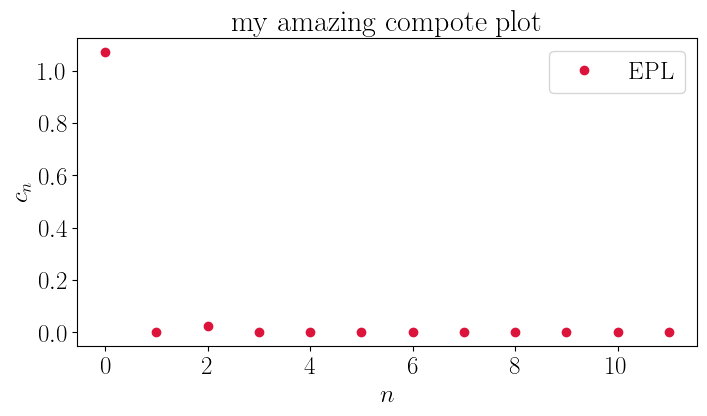

In [10]:
plot_kwargs = {'color': 'crimson', 'ls': ' ', 'marker': 'o', 'label': 'EPL'}

plt.coefficient_plot(c_epl, orders, plot_kwargs,  title='my amazing compote plot')